In [33]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [34]:
img_array = cv2.imread("/kaggle/input/fer-2013-facial-expression-dataset/train/Angry/0.png")


In [35]:
img_array.shape

(48, 48, 3)

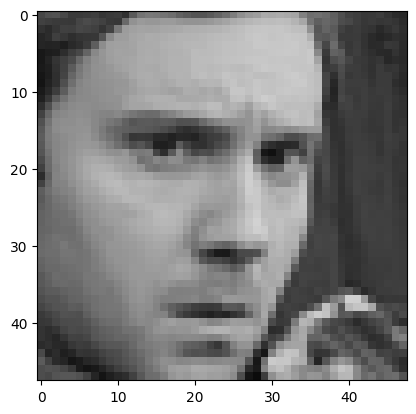

In [36]:
plt.imshow(img_array)

In [37]:
Datadirectory = "/kaggle/input/fer-2013-facial-expression-dataset/train"

In [97]:
#Angry

#Disgust

#Fear

#Happy

#Neutral

#Sad

#Surprise

In [39]:
classes = ["Angry", "Disgust", "Fear","Happy","Neutral", "Sad","Surprise"] # folder names

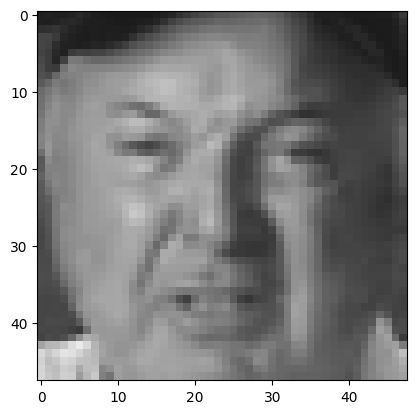

In [40]:
# Read all the train images

for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        break

    break

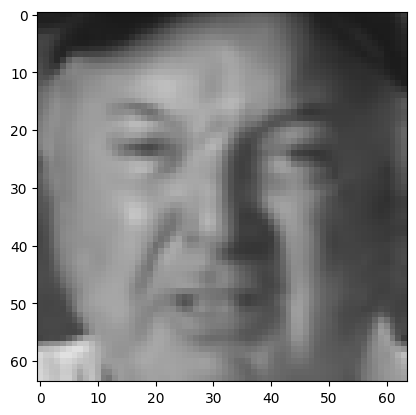

In [41]:
img_size = 64 ## ImagNet => 224 * 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
new_array.shape

(64, 64, 3)

## Read all the images and convertin them to arrary

In [43]:

            
        #plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        
    

In [44]:

training_Data = []  # Data array

def create_Training_Data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

create_Training_Data()
print(len(training_Data))


28709


In [45]:
create_Training_Data()

In [46]:
print(len(training_Data))

57418


In [47]:
import random

random.shuffle(training_Data)

In [48]:
X = []
y = []

for features, label in training_Data:
    if features is not None:  # important to filter broken images
        X.append(features)
        y.append(label)

X = np.array(X).astype("float32") / 255.0
y = np.array(y)


In [49]:
X.shape

(57418, 64, 64, 3)

In [50]:
# normalize the data
#X = X/225;

In [51]:
type(y)
y = np.array(y)
y.shape

(57418,)

## Deep Learning model Training - Transfer Learning

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
model = tf.keras.applications.MobileNetV2(
    input_shape =(64, 64, 3),
    include_top =False,
    weights ="imagenet"
) # pre-trained Model


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"

## Transfer Learning - Tning, weights will start from last check point

In [ ]:
base_input = model.input  ##input
X = model.output
X =layers.GlobalAveragePooling2D()(X)
X = layers.Dense(128, activation='relu')(X)
X = layers.Dense(64, activation ='relu')(X)
final_output = layers.Dense(7, activation='softmax')(X)

In [ ]:
#base_output = model.layers[-2].output

In [ ]:
new_model = keras.Model(inputs = base_input, outputs =final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X dtype: {X.dtype}")
print(f"y dtype: {y.dtype}")


In [61]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Set paths and classes
data_dir = "/kaggle/input/fer-2013-facial-expression-dataset/train"
classes = ["Angry", "Disgust", "Fear", "Neutral", "Sad", "Happy", "Surprise"]
img_size = 64

X = []
y = []

for label, category in enumerate(classes):
    path = os.path.join(data_dir, category)
    for img_name in tqdm(os.listdir(path), desc=f"Loading {category}"):
        try:
            img_path = os.path.join(path, img_name)
            img_array = cv2.imread(img_path)
            if img_array is not None:
                resized_img = cv2.resize(img_array, (img_size, img_size))
                X.append(resized_img)
                y.append(label)
        except Exception as e:
            pass  # optionally print(e) to debug specific failures

# Convert to NumPy arrays and normalize
X = np.array(X, dtype="float32") / 255.0
y = np.array(y)

# Check shapes again
print("✅ Final shapes:")
print("X shape:", X.shape)  # Expected: (n_samples, 64, 64, 3)
print("y shape:", y.shape)  # Expected: (n_samples,)


Loading Surprise: 100%|██████████| 3171/3171 [00:03<00:00, 992.62it/s] 


✅ Final shapes:
X shape: (28709, 64, 64, 3)
y shape: (28709,)


In [62]:
new_model.fit(X, y, epochs=25, validation_split=0.2)

Epoch 1/25
715/718 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3488 - loss: 1.5867

E0000 00:00:1751658634.767111      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751658634.903513      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 52ms/step - accuracy: 0.3492 - loss: 1.5859 - val_accuracy: 0.4345 - val_loss: 16.7945
Epoch 2/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5132 - loss: 1.2303 - val_accuracy: 0.3983 - val_loss: 17.4564
Epoch 3/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5783 - loss: 1.0989 - val_accuracy: 0.3858 - val_loss: 14.5934
Epoch 4/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6012 - loss: 1.0413 - val_accuracy: 0.4173 - val_loss: 14.6735
Epoch 5/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6257 - loss: 0.9835 - val_accuracy: 0.3406 - val_loss: 19.9188
Epoch 6/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6508 - loss: 0.9410 - val_accuracy: 0.3492 - val_loss: 15.4377
Epoch 7/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6657 - loss: 0.8837 - val_accuracy: 0.4037 - val_loss: 15.0690
Epoch 8/25
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6812 - loss: 0.8437 - val_

In [64]:
new_model.save("final_model.keras")

In [66]:
new_model = tf.keras.models.load_model("final_model.keras")

In [122]:
frame = cv2.imread("/kaggle/input/fer-2013-facial-expression-dataset/train/Angry/10057.png")

In [123]:
frame.shape

(48, 48, 3)

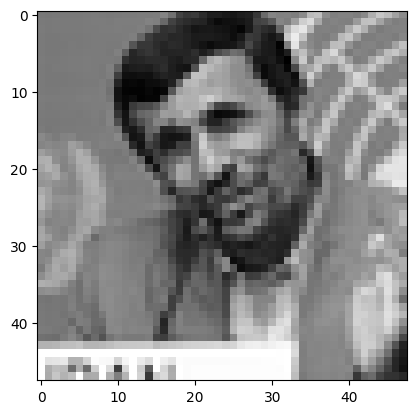

In [124]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
# we need face dectection algorithn(gray image)

In [125]:
facecascade = cv2.CascadeClassifier("/kaggle/input/haarcascadeface/haarcascade-frontalface-default.xml")


In [126]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [127]:
gray.shape

(48, 48)

In [128]:


# Assuming `gray` is the grayscale image and `frame` is the BGR image
faces = facecascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

for (x, y, w, h) in faces:
    # Region of interest in grayscale and color (BGR)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

    # Draw rectangle around face
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Optional: detect eyes or more features inside the face
    faces_inside = facecascade.detectMultiScale(roi_gray)
    if len(faces_inside) == 0:
         print("Face not detected inside ROI")
    else:
        for (ex, ey, ew, eh) in faces_inside:
            
            face_roi=cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


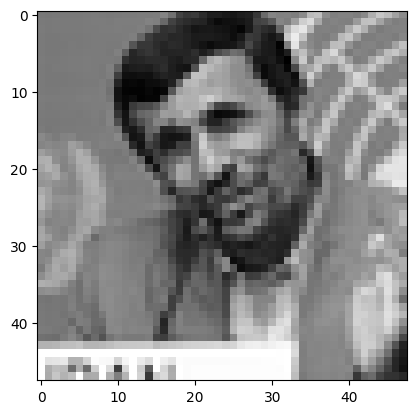

In [129]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

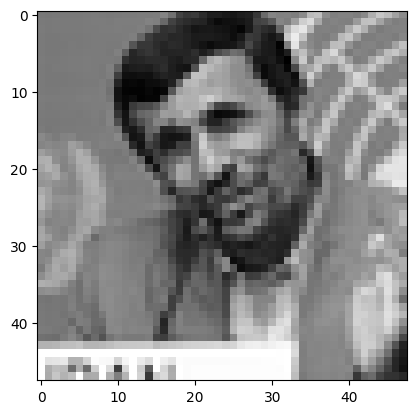

In [131]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [132]:
final_image = cv2.resize(frame, (64, 64))
final_image = np.expand_dims(final_image, axis=0)## need 4 dimension
final_image = final_image/255 ## normalizing

In [133]:
predictions = new_model.predict(final_image)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([8.6724199e-03, 9.3021245e-06, 9.9041069e-01, 1.5470612e-05,
       8.1691891e-04, 7.5194490e-05, 5.6116237e-27], dtype=float32)

In [134]:
np.argmax(predictions)

2

In [135]:
def get_emotion_label(prediction, classes):
    index = np.argmax(prediction)
    return classes[index]


In [136]:
get_emotion_label(predictions, classes)  # ➝ 'Happy'


'Fear'

In [138]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model (adjust path if needed)
model = load_model("final_model.keras")

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Emotion class labels (adjust to your training order)
classes = ["Angry", "Disgust", "Fear", "Neutral", "Sad", "Happy", "Surprise"]

# Start video capture
cap = cv2.VideoCapture(0)  # Use 1 if 0 doesn't work

# Font settings
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 255, 0)
thickness = 2

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 2)

        # Crop and preprocess face for prediction
        face_roi = frame[y:y+h, x:x+w]
        try:
            resized_face = cv2.resize(face_roi, (224, 224))  # MobileNetV2 input size
            normalized_face = resized_face / 255.0
            reshaped_face = np.expand_dims(normalized_face, axis=0)  # Add batch dimension

            # Predict emotion
            predictions = model.predict(reshaped_face)
            predicted_index = np.argmax(predictions)
            status = classes[predicted_index]

            # Text background rectangle
            (text_width, text_height), _ = cv2.getTextSize(status, font, font_scale, thickness)
            cv2.rectangle(frame, (x, y - 30), (x + text_width + 10, y), (0, 0, 0), -1)

            # Draw text
            cv2.putText(frame, status, (x + 5, y - 5), font, font_scale, font_color, thickness)

        except Exception as e:
            print("Error processing face:", e)

    # Display the frame
    cv2.imshow("Face Emotion Recognition", frame)

    # Exit on key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release and clean up
cap.release()
cv2.destroyAllWindows()


Failed to grab frame


[ WARN:0@9975.687] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@9975.687] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
